# Loading Libraries

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Loading the dataset

In [ ]:
file_path = os.path.join(os.getcwd(), '..', 'data', 'loan_data.csv')

try:
	df = pd.read_csv(file_path)
	display(df.head())
except FileNotFoundError:
	print("Error: 'loan_data.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
	print(f"An error occurred: {e}")

# Data Exploration

In [8]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
display(df.describe())

# Analyze the distribution of categorical features
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

Shape of the DataFrame: (45000, 14)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 no

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000



Value counts for person_gender:


person_gender
male      24841
female    20159
Name: count, dtype: int64


Value counts for person_education:


person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


Value counts for person_home_ownership:


person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


Value counts for loan_intent:


loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


Value counts for previous_loan_defaults_on_file:


previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


Value counts for loan_status:


loan_status
0    35000
1    10000
Name: count, dtype: int64


Correlation Matrix:


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000


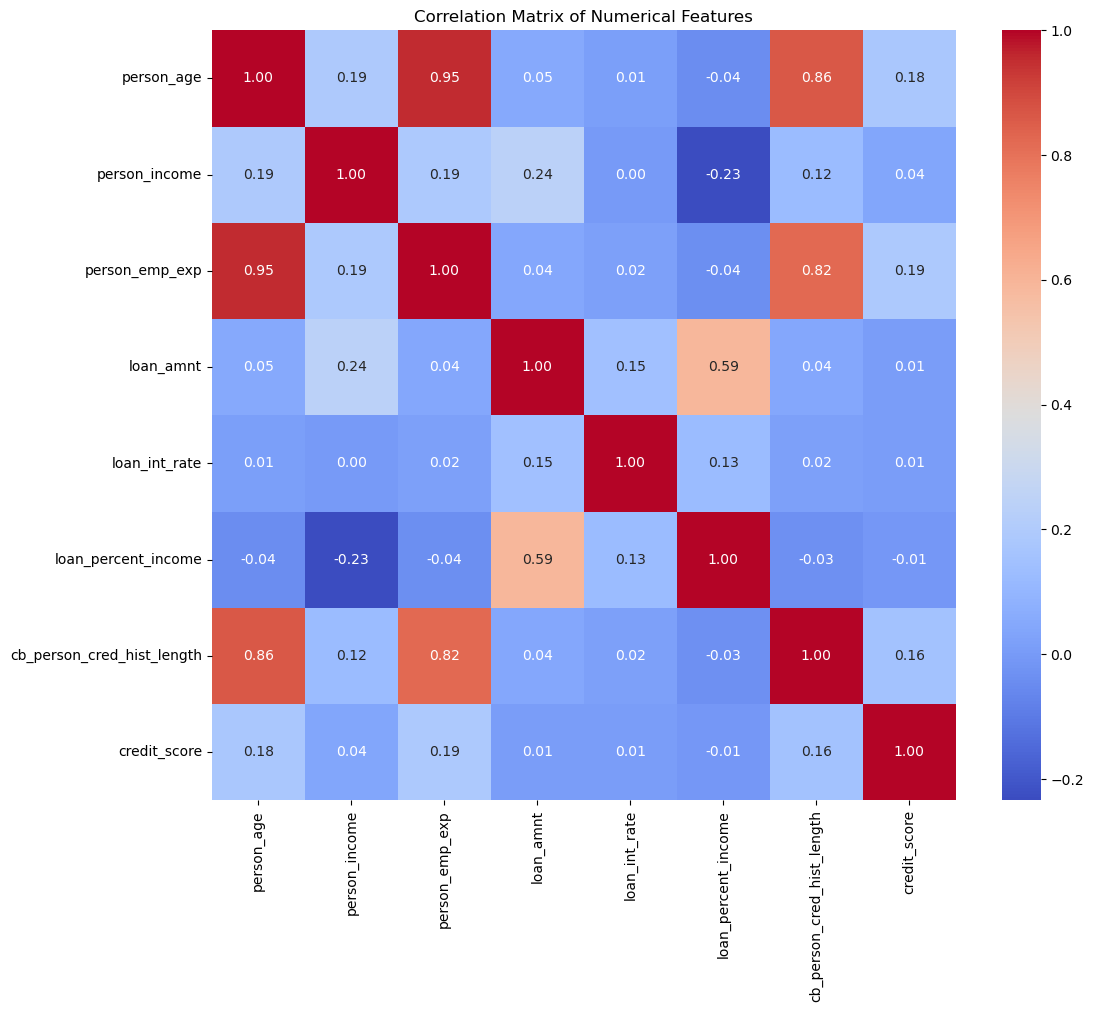

In [9]:
# Calculate the correlation matrix for numerical features
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

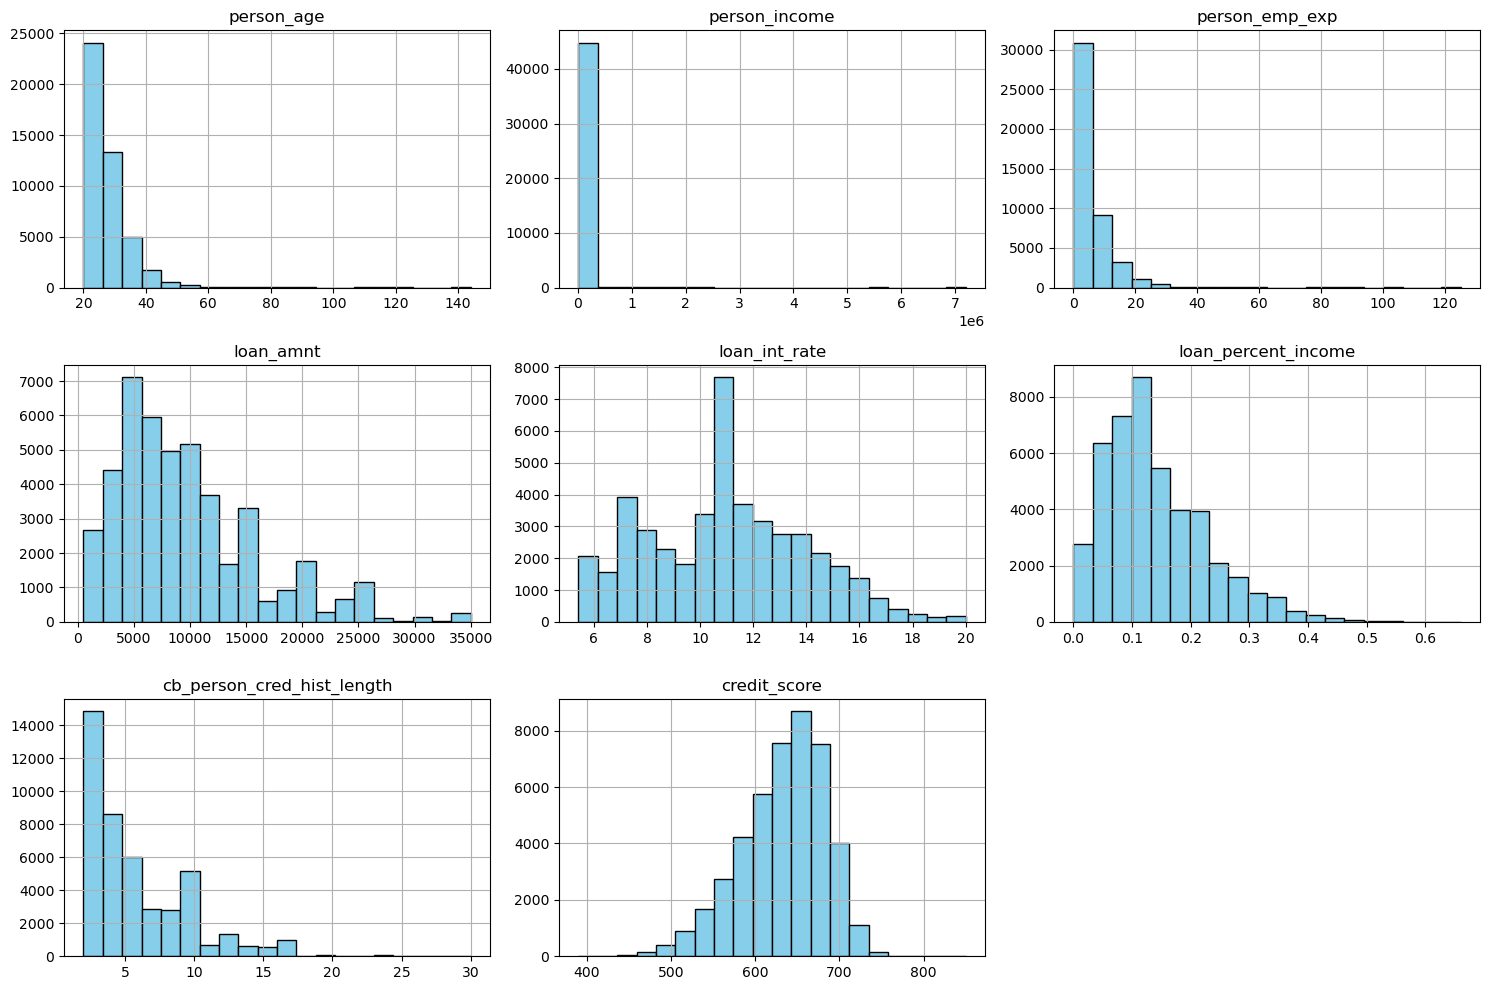

In [10]:
# Numerical features analysis
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
df[numerical_features].describe()
df[numerical_features].hist(figsize=(15, 10), bins=20, layout=(3, 3), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


Unique values and counts for person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64


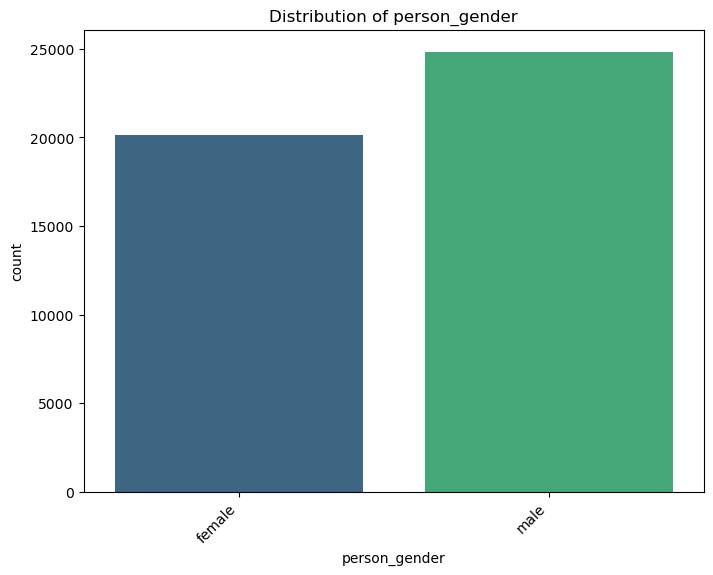


Unique values and counts for person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64


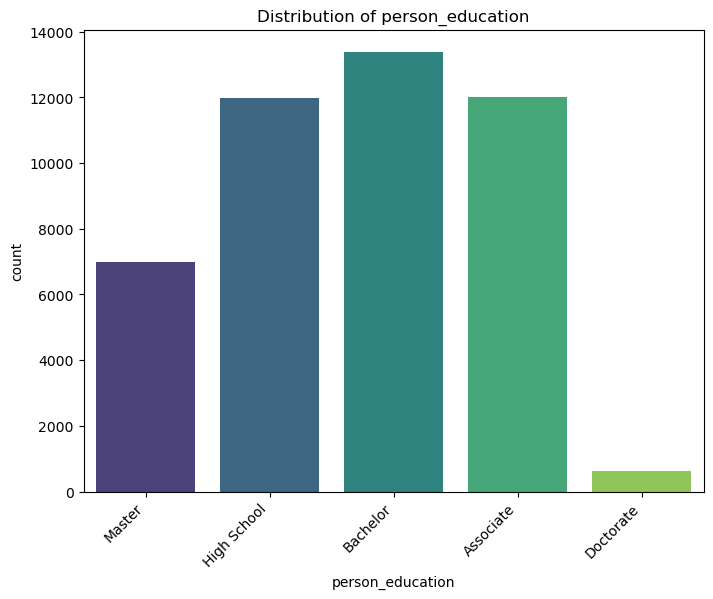


Unique values and counts for person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


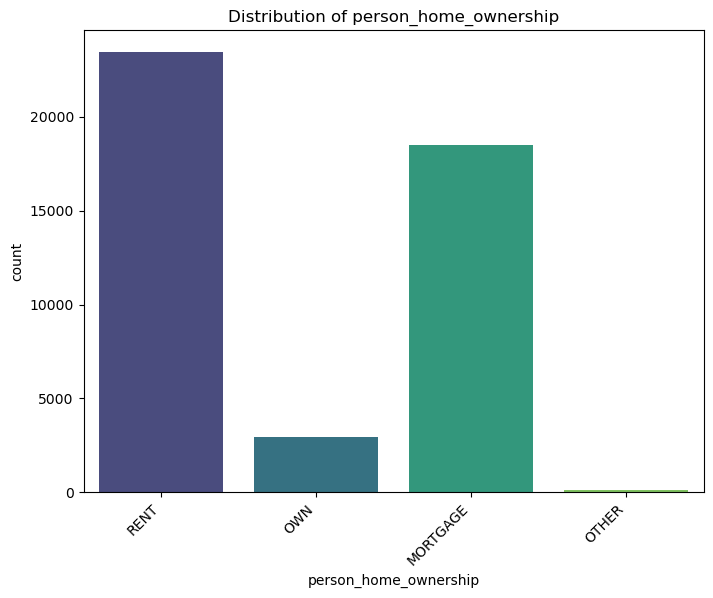


Unique values and counts for loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64


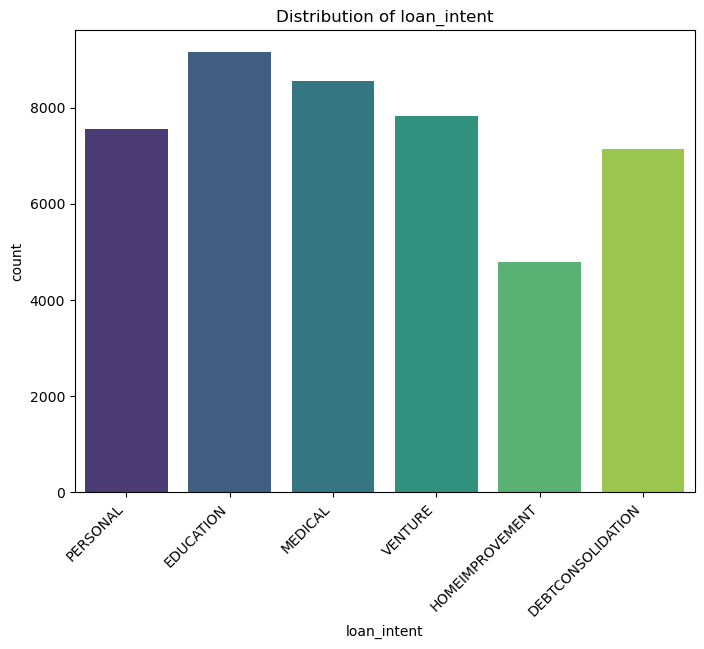


Unique values and counts for previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


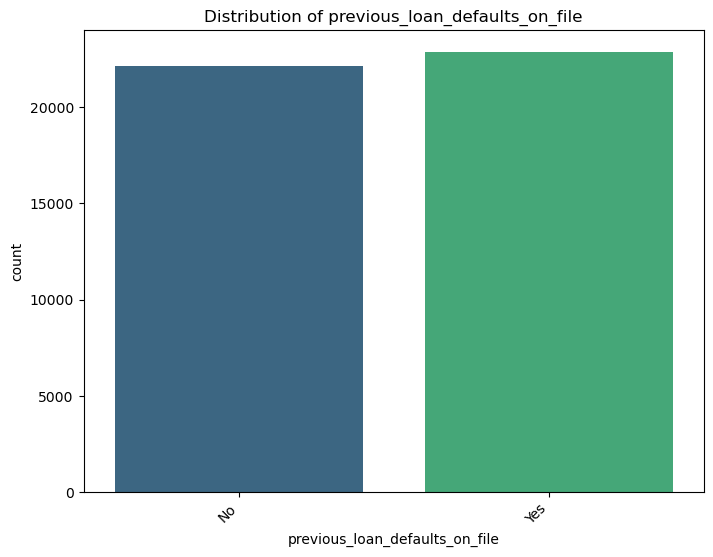


Unique values and counts for loan_status:
loan_status
0    35000
1    10000
Name: count, dtype: int64


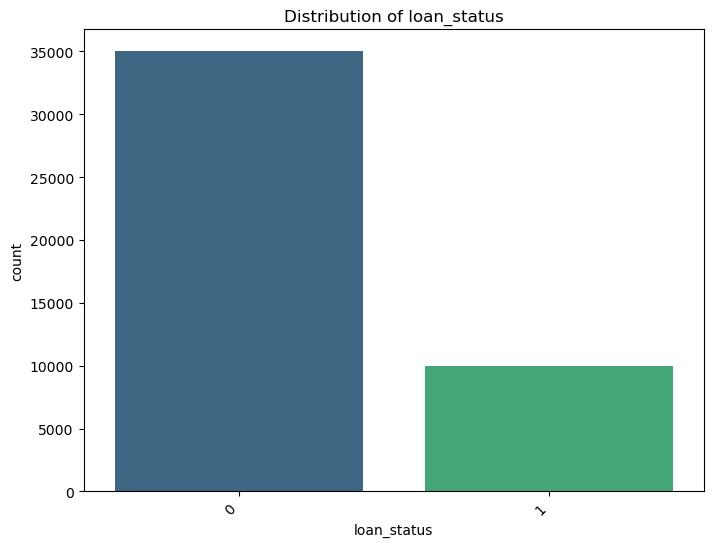

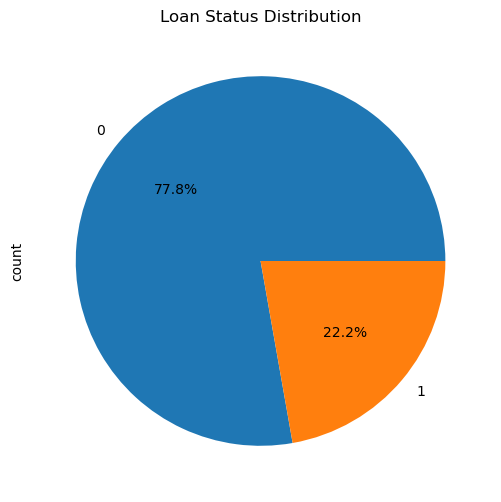

In [12]:
# Categorical features analysis
categorical_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
for col in categorical_features:
    print(f"\nUnique values and counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, hue=col, palette="viridis", legend=False)  # Changes here
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Target variable analysis
plt.figure(figsize=(6, 6))
df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

# Data Cleaning

In [13]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Impute missing values
for col in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']:
    df[col] = df[col].fillna(df[col].median())
for col in ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Identify outliers using IQR for numerical features
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Remove duplicate rows
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Removed {num_duplicates} duplicate rows.")

display(df.head())

Missing values per column:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Removed 0 duplicate rows.


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No,1


# One Hot Encoding the Categorical Features

In [15]:
# Identify categorical and numerical columns
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded and scaled DataFrames
processed_df = pd.concat([df[numerical_cols], encoded_df], axis=1)

# Display the first few rows of the processed DataFrame
display(processed_df.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,21.0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,23.0,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24.0,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Feature Engineering

In [16]:
import numpy as np
# Create interaction terms

processed_df['income_credit_interaction'] = processed_df['person_income'] * processed_df['credit_score'] # This interaction captures the combined effect of a person's income and creditworthiness. Higher income with a higher credit score generally indicates lower risk.
processed_df['loan_amnt_int_rate'] = processed_df['loan_amnt'] * processed_df['loan_int_rate'] # This interaction represents the total interest payable on the loan. Higher loan amounts with higher interest rates would likely increase the risk of default.
processed_df['loan_percent_income_credit_hist_interaction'] = processed_df['loan_percent_income'] * processed_df['cb_person_cred_hist_length'] # This interaction combines the loan's burden relative to income with the borrower's credit history length. A higher loan percentage with a shorter credit history might indicate higher risk.
processed_df['debt_to_income'] = processed_df['loan_amnt'] / processed_df['person_income'] # Create ratio features

processed_df['loan_amnt_squared'] = processed_df['loan_amnt']**2 # Create polynomial features
processed_df['person_income_squared'] = processed_df['person_income']**2 # Create polynomial features
processed_df['credit_score_squared'] = processed_df['credit_score']**2 # Create polynomial features



# Log transformation for skewed features
for col in ['person_income', 'loan_amnt', 'loan_amnt_squared', 'person_income_squared']:
    processed_df[f'{col}_log'] = np.log1p(processed_df[col]) # Log transformation to handle positive skew

# Binning and one-hot encoding in one step
age_group_dummies = pd.get_dummies(
    pd.cut(processed_df['person_age'], bins=[18, 25, 35, 50, 100], labels=['18-24', '25-34', '35-49', '50+']),
    prefix='age',
    drop_first=True,  # Drop the first category to avoid multicollinearity
    dtype=int         # Set dtype to int to get 1s and 0s
)

# Concatenate the dummy columns to the DataFrame
processed_df = pd.concat([processed_df, age_group_dummies], axis=1)

display(processed_df.head())

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,loan_amnt_squared,person_income_squared,credit_score_squared,person_income_log,loan_amnt_log,loan_amnt_squared_log,person_income_squared_log,age_25-34,age_35-49,age_50+
0,22.0,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,1,1.0,...,5.332924e+08,5.176515e+09,314721.0,11.183713,10.047334,20.094580,22.367398,0,0,0
1,21.0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,0,1.0,...,1.000000e+06,1.508475e+08,254016.0,9.415971,6.908755,13.815512,18.831780,0,0,0
2,25.0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,1,1.0,...,3.025000e+07,1.547038e+08,403225.0,9.428592,8.612685,17.225007,18.857023,0,0,0
3,23.0,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,1,1.0,...,5.332924e+08,6.360541e+09,455625.0,11.286702,10.047334,20.094580,22.573379,0,0,0
4,24.0,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,1,0.0,...,5.332924e+08,4.373838e+09,343396.0,11.099469,10.047334,20.094580,22.198907,0,0,0


In [17]:
#dropping features for which either log trtansformation has been used or dummy variables created
processed_df = processed_df.drop(['person_age', 'person_income', 'loan_amnt', 'loan_amnt_squared', 'person_income_squared'], axis=1) 

In [18]:
processed_df.columns

Index(['person_emp_exp', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'loan_status',
       'person_gender_female', 'person_gender_male',
       'person_education_Associate', 'person_education_Bachelor',
       'person_education_Doctorate', 'person_education_High School',
       'person_education_Master', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_No',
       'previous_loan_defaults_on_file_Yes', 'income_credit_interaction',
       'loan_amnt_int_rate', 'loan_percent_income_credit_hist_interaction',
       'debt_to_income', 'credit_score_squared', 'person_income_log',
       'loan_amnt_log', 'loan_amnt_squared_log', 'person_income_square

## Saving the data for training

In [ ]:
# Save the processed DataFrame to a CSV file in the data folder
output_file_path = os.path.join(os.getcwd(), '..', 'data', 'training_data.csv')
processed_df.to_csv(output_file_path, index=False)
print(f"Processed data saved to {output_file_path}")